In [ ]:
#Se Instalan librerias
#pip install geopandas matplotlib

Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3


Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_1.geojson: LineString    100
Name: count, dtype: int64
❌ Error en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_1.geojson: cannot insert ID, already exists
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_2.geojson: LineString    100
Name: count, dtype: int64
📌 Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_3.geojson: LineString    100
Name: count, dtype: int64
📌 Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDri

Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3
Skipping field origen: unsupported OGR type: 3
Skipping field destino: unsupported OGR type: 3


Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_6.geojson: LineString    100
Name: count, dtype: int64
📌 Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_7.geojson: LineString    100
Name: count, dtype: int64
📌 Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_8.geojson: LineString    100
Name: count, dtype: int64
📌 Proyección del archivo después de reproyectar: EPSG:32719
Tipos de geometría en C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_9.geojson: LineString  

C:\Users\jose.cordova\AppData\Local\Temp\ipykernel_22752\163160680.py:71: UserWarning: `keep_geom_type=True` in overlay resulted in 8049 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  solapamiento = gpd.overlay(gdf_1, gdf_2, how='intersection')


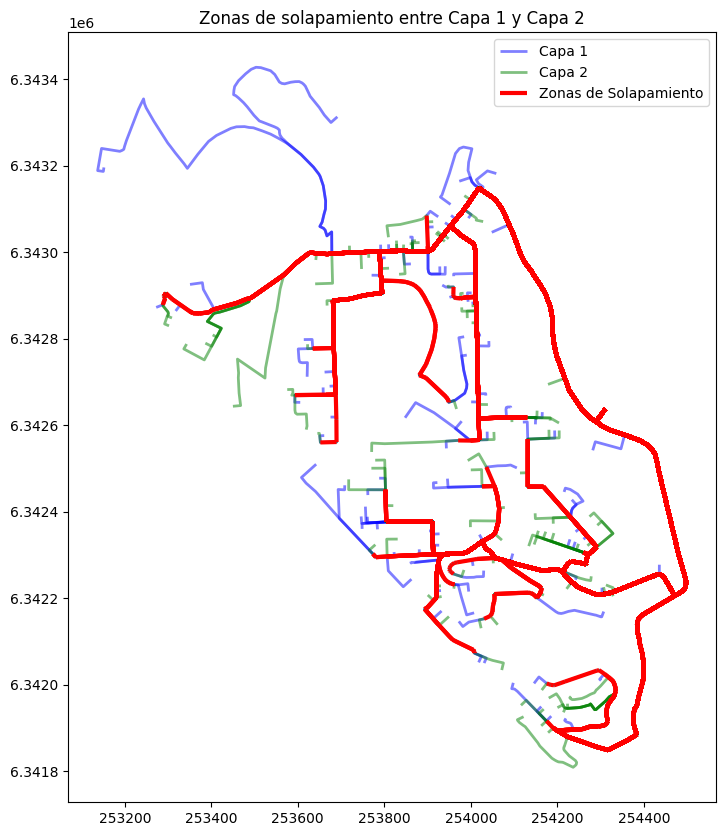

ValueError: GeoDataFrame cannot contain duplicated column names.

In [2]:
import geopandas as gpd
from shapely.geometry import LineString  #nuevo
import matplotlib.pyplot as plt

# Función para cargar líneas y filtrar problemas
def cargar_lineas(ruta):
    try:
        gdf = gpd.read_file(ruta)

        # Mostrar los tipos de geometría para depurar
        tipos_geometria = gdf.geometry.type.value_counts()
        print(f"Tipos de geometría en {ruta}: {tipos_geometria}")

        # Filtrar solo geometrías de tipo LineString
        gdf = gdf[gdf.geometry.type == 'LineString']


        # Si el GeoDataFrame está vacío, crear una fila con ID=1 y geometría vacía
        if gdf.empty:
            print(f"⚠️ {ruta} está vacío. Creando un ID=1 con geometría de ejemplo.")
            geometria_ejemplo = LineString([(0, 0), (1, 1)])  # Línea de ejemplo
            gdf = gpd.GeoDataFrame({'ID': [1], 'geometry': [geometria_ejemplo]}, crs="EPSG:4326")
        else:
            # Asignar un ID único comenzando desde 1
            gdf.insert(0, 'ID', range(1, len(gdf) + 1))

        # Reproyectar a EPSG:32719 (UTM zona 19S, por ejemplo)
        gdf = gdf.to_crs(epsg=32719)

        # Verificar la proyección
        print(f"📌 Proyección del archivo después de reproyectar: {gdf.crs}")

        return gdf

    except Exception as e:
        print(f"❌ Error en {ruta}: {e}")
        return None
      

# Lista de rutas a los archivos GeoJSON (de rutas_1 a rutas_10)
#rutas = [fr'C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Carvallo\rutas_{i}.geojson' for i in range(1, 11)] #Información de Carvallo
rutas = [fr'C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\Ruben_Dario\rutas_{i}.geojson' for i in range(1, 11)] #Información de Ruben Dario
#rutas = [fr'C:\Users\jose.cordova\OneDrive - IDOM Consulting, Engineering, Architecture S.A.U\Jupyter Notebook\Catchment_Valparaiso\San_Mateo\rutas_{i}.geojson' for i in range(1, 11)] #Información de San Mateo
# Cargar todas las capas de líneas
gdfs = [cargar_lineas(ruta) for ruta in rutas]

# Filtrar las capas no válidas (None)
gdfs = [gdf for gdf in gdfs if gdf is not None]

# Verificar si se han cargado capas válidas
if not gdfs:
    print("⚠️ No se pudieron cargar las capas correctamente.")
else:
    # Proceso por pares de capas
    for i in range(0, len(gdfs), 2):
        if i + 1 < len(gdfs):  # Asegurarnos de que no excedemos el índice
            gdf_1 = gdfs[i]
            gdf_2 = gdfs[i + 1]

            # Graficar ambas capas
            fig, ax = plt.subplots(figsize=(10, 10))
            gdf_1.plot(ax=ax, color='blue', alpha=0.5, linewidth=2, label=f'Capa {i+1}')
            gdf_2.plot(ax=ax, color='green', alpha=0.5, linewidth=2, label=f'Capa {i+2}')

            # Encontrar zonas de solapamiento entre ambas capas
            solapamiento = gpd.overlay(gdf_1, gdf_2, how='intersection')

            # Visualizar los solapamientos en color rojo
            solapamiento.plot(ax=ax, color='red', linewidth=3, label='Zonas de Solapamiento')

            plt.title(f'Zonas de solapamiento entre Capa {i+1} y Capa {i+2}')
            plt.legend()
            plt.show()

            # Guardar el resultado de solapamiento
            solapamiento.to_file(f'zona_solapamiento_{i+1}_{i+2}.geojson', driver='GeoJSON')
            print(f"✅ Zonas de solapamiento entre Capa {i+1} y Capa {i+2} guardadas.")

